In [30]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris


In [31]:
iris = load_iris()
print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [32]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [33]:
x=pd.DataFrame(iris['data'],columns=['Sepal Length in cm','Sepal Width in cm ','Petal Length in cm ','Petal Width in cm '])

In [34]:
x

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y=iris['target']

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   

In [39]:
model=DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
y_pred=model.predict(x_test)

In [41]:
y_pred=model.predict(x_test)

MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Score: 1.0


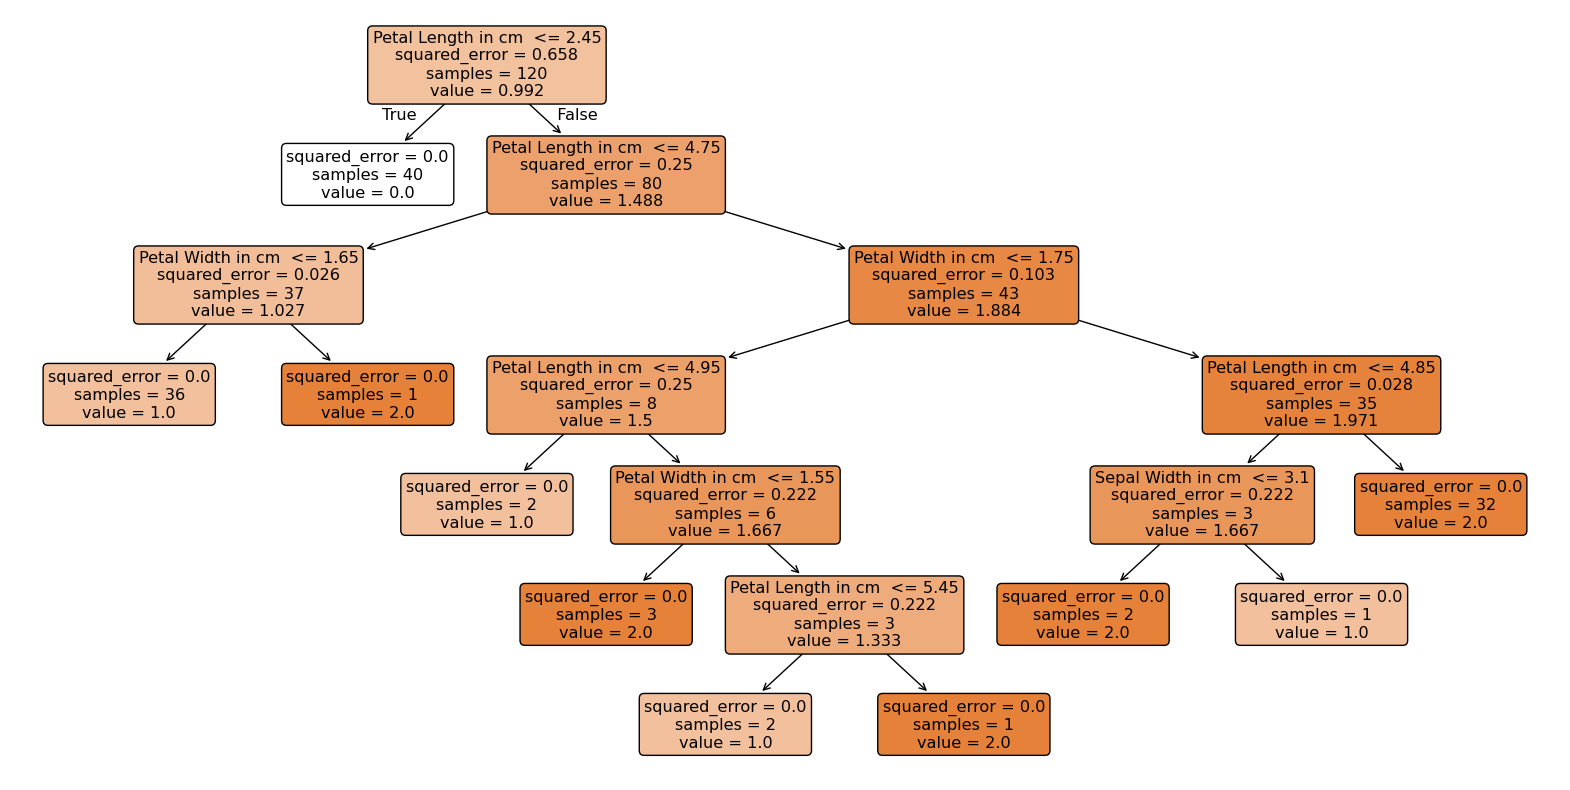

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.show()

In [43]:
# Decision Tree Regressor with Prepuning and Hyperparameter Tuning.

In [44]:
param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2']
}

param


{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': [None, 'sqrt', 'log2']}

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [46]:
import warnings
warnings.filterwarnings('ignore')
model = DecisionTreeRegressor(random_state=42)

In [47]:
grid = GridSearchCV(
    model,
    param_grid=param,
    cv=5,
    scoring='r2'   
)


In [48]:
grid.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [49]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'splitter': 'random'}

In [50]:
y_pred = grid.predict(x_test)


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.04027436527436522
MSE: 0.002465969711055699
RMSE: 0.049658531100463484
R2 Score: 0.9964715854690777
